In [442]:
import numpy as np
from sklearn.model_selection import train_test_split

In [443]:
!ls
#load data
data = np.loadtxt('housing.txt')
print(data.shape)

Boston-adaptive learning rate.ipynb housing.names.txt
boston.ipynb                        housing.txt
(506, 14)


In [444]:
#separate data into inputs and outputs
x = data[:,:13]
y = data[:,13]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [445]:
#normalize inputs
#print(x.shape)
for i in range(x.shape[1]):
    #print(i)
    t = x[:,i]
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))


In [446]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(506, 14)


In [447]:
print(x[:5,:])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.08015267e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02 1.00000000e+00]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01 1.00000000e+00]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 9.89737254e-01
  6.34657837e-02 1.00000000e+00]
 [2.92795719e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.58555279e-01 4.41812564e-01 4.48544590e-01
  8.69565217e-02 6.67938931e-02 6.48936170e-01 9.94276060e-01
  3.33885210e-02 1.00000000e+00]
 [7.05070075e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.87104809e-01 5.28321318e-01 4.48544590e-01


In [448]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
ytr = ytr.reshape(ytr.shape[0],1)
yte = yte.reshape(yte.shape[0],1)

In [449]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[0.22919833]
 [0.98635318]
 [0.71310014]
 [0.56308794]
 [0.96381752]
 [0.74215732]
 [0.59166494]
 [0.00391812]
 [0.6779177 ]
 [0.6783077 ]
 [0.85856009]
 [0.20911193]
 [0.83385792]
 [0.12467806]]
(14, 1)


In [450]:
#define hyper-parameters
epochs = 2000
a = 0.07

In [451]:
#linear regression with constant learning rate 
train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = xte.shape[0]

for i in range(epochs):
    ybar = np.dot(xtr,w)
    
    #mse error in training set
    err = np.sum((ybar - ytr)**2)/(2*m)
    train_acc.append(err)
    
    #mse error in test set
    tmp = np.dot(xte,w)
    tmp_err = np.sum((tmp - yte)**2)/(2*mte)
    test_acc.append(tmp_err)
    
    #calculate gradient
    del_y = ybar - ytr
    
    for j in range(n):
        xcurr = xtr[:,j]
        xcurr = xcurr.reshape(xcurr.shape[0],1)
        del_w = (sum(del_y[:]*xcurr[:]))/(m)
        
        w[j] = w[j] - a*del_w

    if(i%100 == 0):
        print("Train Error", err)
        print("Test Error", tmp_err)

Train Error 234.01761626857095
Test Error 233.9691068048401
Train Error 21.873415937601035
Test Error 26.400011430386552
Train Error 17.2727545140411
Test Error 22.706699966236126
Train Error 14.796515248926479
Test Error 20.449617789985886
Train Error 13.296172668128822
Test Error 19.00069154338455
Train Error 12.33576323189811
Test Error 18.040905126842535
Train Error 11.69480394357289
Test Error 17.386190624410457
Train Error 11.252730817916447
Test Error 16.92791188755896
Train Error 10.939237777807355
Test Error 16.59910732504804
Train Error 10.711220251213362
Test Error 16.35710107595788
Train Error 10.541262474871814
Test Error 16.174083866348827
Train Error 10.4114626507634
Test Error 16.03166710078313
Train Error 10.3099054952971
Test Error 15.91756722725574
Train Error 10.228542889810221
Test Error 15.823514247048497
Train Error 10.161871815935148
Test Error 15.743901862040389
Train Error 10.106087230992856
Test Error 15.674903476964298
Train Error 10.058528900127948
Test Err

<IPython.core.display.Javascript object>


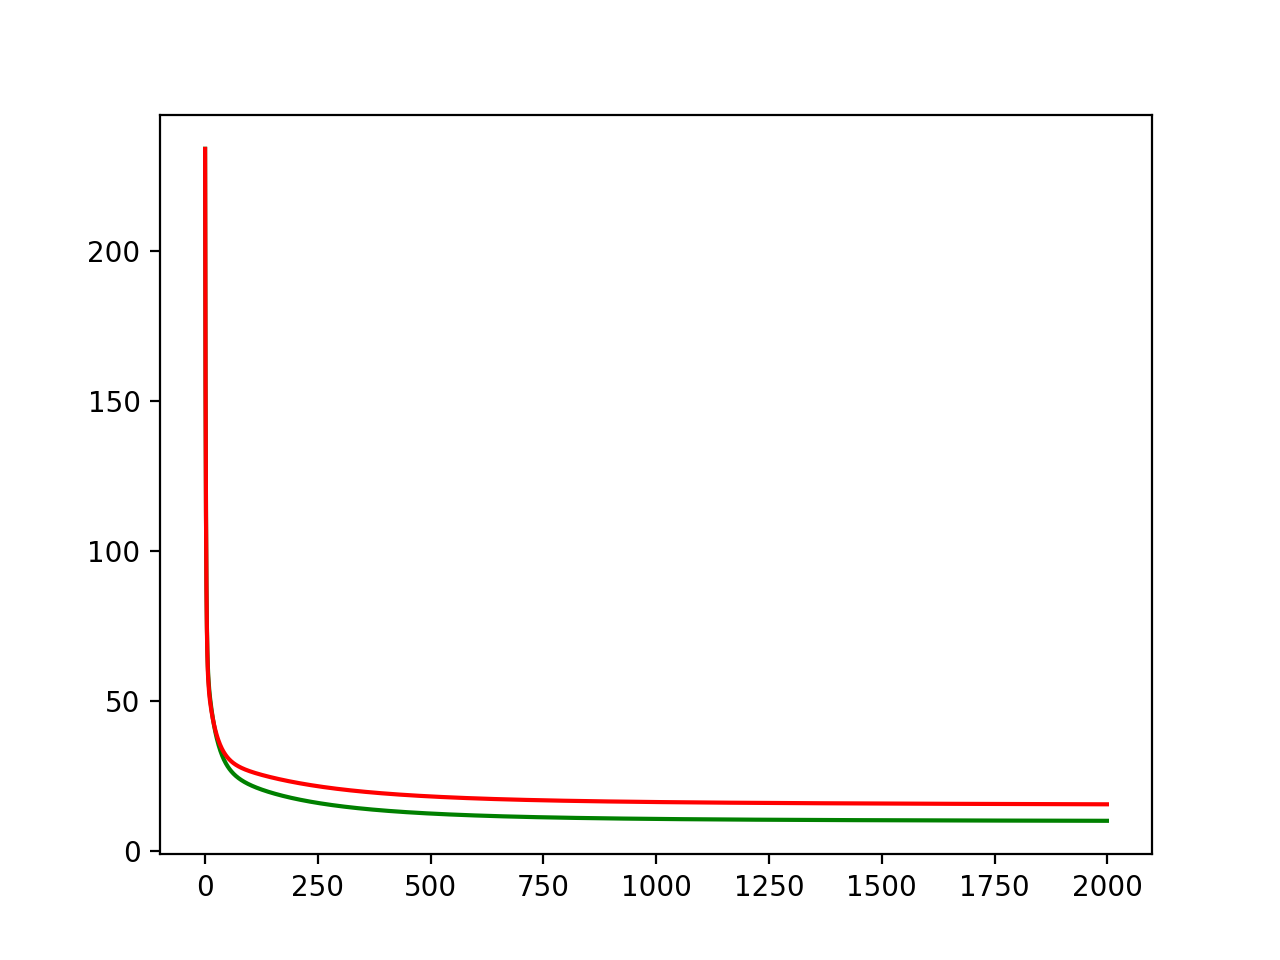

In [452]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()